# Засоиб підготовки та аналізу даних
# Лабораторна робота №6

In [315]:
import numpy as np
import matplotlib.pyplot as plt

## Завдання 1
1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу
результатів.
2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k^ та b^.
3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).
4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

In [316]:
#1

k = 2
b = 5

x = np.random.rand(100)

y = k * x + b + np.random.randn(100)
# y = k * x + b

print("x:", x)
print("y:", y)

x: [0.77277433 0.47624239 0.41493497 0.00384598 0.27125266 0.55072131
 0.89073723 0.60037879 0.9103893  0.73064124 0.93065776 0.30673552
 0.84571134 0.14962929 0.87453224 0.70787151 0.22479564 0.57792159
 0.11063114 0.9148469  0.25264467 0.71656396 0.07553282 0.10775297
 0.61652097 0.08763345 0.38015807 0.06536564 0.20058893 0.883969
 0.74549866 0.04969132 0.02549468 0.23168184 0.28335285 0.2533857
 0.51578604 0.76981018 0.34572034 0.05627767 0.78008498 0.33317863
 0.16850285 0.54105739 0.78479274 0.56122136 0.38708029 0.13182145
 0.66409387 0.73343083 0.21392045 0.14907673 0.47267674 0.92253803
 0.71601219 0.15721803 0.04649745 0.6422643  0.57497061 0.25304217
 0.00312032 0.84738624 0.55401586 0.71247514 0.08973573 0.87016183
 0.26624513 0.09634117 0.13926605 0.80245852 0.23293743 0.09742775
 0.77974352 0.12062202 0.70794364 0.57566948 0.05876672 0.63026946
 0.18371157 0.74165608 0.16786568 0.10590741 0.79014655 0.41537181
 0.25631306 0.84559099 0.55671733 0.12899091 0.45206302 0.1743

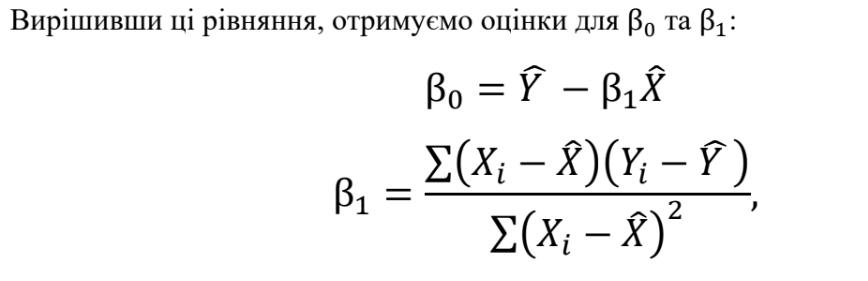

In [317]:
#2

mean_x = np.mean(x)
mean_y = np.mean(y)

sum1 = 0
for i, j in zip(x, y):
    sum1 += (i-mean_x)*(j-mean_y)
    
sum2 = 0
for i in x:
    sum2 += (i-mean_x)**2

b1 = sum1/sum2
b0 = mean_y - mean_x*b1

print(b1)
print(b0)

2.338664314148661
4.8917873471673445


In [318]:
#3

# ну схожі ж
args = np.polyfit(x,y,1)
print(args)

[2.33866431 4.89178735]


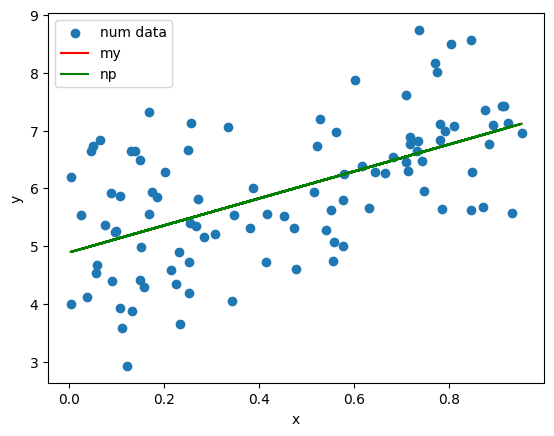

In [319]:
#4

plt.scatter(x, y, label='num data')

plt.plot(x, b1*x + b0, color='red', label='my')
plt.plot(x, args[0]*x+args[1], color='green', label='np')
# plt.plot(x, np.polyval(np.polyfit(x, y, 1), x), color='green', label='np')

# plt.plot(x, b0-b1*x, color='red', label='my')
# plt.plot(x, args[1]-args[0]*x, color='green', label='np')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

## Завдання 2
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k^ та b^. Визначіть оптимальні вхідні параметри: learning_rate, n_iter
2. Додайте отриману лінію регресії на загальний графік
3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки
4. Порівняйте отримані результати з результатами попереднього завдання

In [329]:
#1

def gradient_descent(x, y, learning_rate = 2, n_iter = 100):
    b1 = 0 # k
    b0 = 0 # b
    m = len(x)
    
    for i in range(n_iter):

        y_pred = b1 * x + b0
        
        gradient_b0 = (-2/m) * sum(y - y_pred)
        gradient_b1 = (-2/m) * sum(x * (y - y_pred))
        
        b0 -= learning_rate * gradient_b0
        b1 -= learning_rate * gradient_b1
    
    return k, b

print(gradient_descent(x, y, 10, 1))
print(gradient_descent(x, y))

(2, 5)
(2, 5)


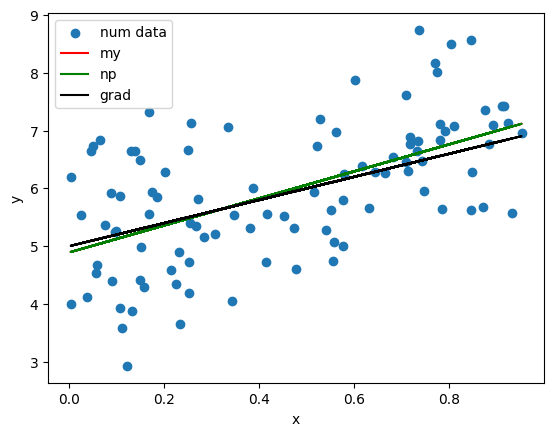

In [326]:
#2

plt.scatter(x, y, label='num data')

plt.plot(x, b1*x + b0, color='red', label='my')
plt.plot(x, args[0]*x+args[1], color='green', label='np')
# plt.plot(x, np.polyval(np.polyfit(x, y, 1), x), color='green', label='np')

# plt.plot(x, b0-b1*x, color='red', label='my')
# plt.plot(x, args[1]-args[0]*x, color='green', label='np')

k,b = gradient_descent(x,y)
plt.plot(x, k*x+b, color='black', label='grad')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

C:\Users\Denys\AppData\Local\Temp\ipykernel_20012\2762267574.py:12: RuntimeWarning: overflow encountered in scalar add
  gradient_b0 = (-2/m) * sum(y - y_pred)
C:\Users\Denys\AppData\Local\Temp\ipykernel_20012\2762267574.py:13: RuntimeWarning: overflow encountered in scalar add
  gradient_b1 = (-2/m) * sum(x * (y - y_pred))
C:\Users\Denys\AppData\Local\Temp\ipykernel_20012\2762267574.py:15: RuntimeWarning: invalid value encountered in scalar subtract
  b0 -= learning_rate * gradient_b0
C:\Users\Denys\AppData\Local\Temp\ipykernel_20012\2762267574.py:16: RuntimeWarning: invalid value encountered in scalar subtract
  b1 -= learning_rate * gradient_b1


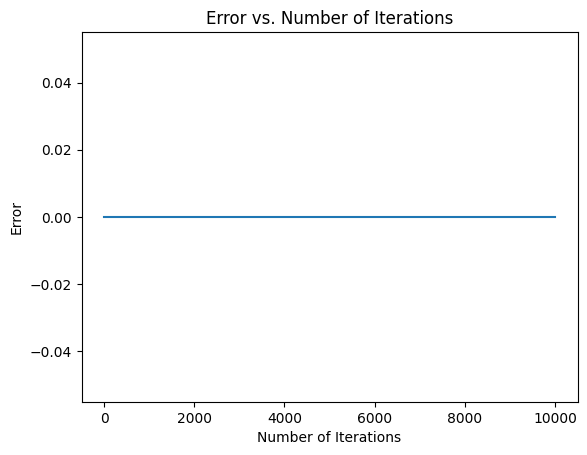

In [337]:
#3
n_iter = 1

iters = []
misses = []

for i in range(5):
    n = 10**i
    rk, rb = gradient_descent(x, y, n_iter=n)
    miss = np.mean([abs(rb - b), abs(rk - k)])

    iters.append(n)
    misses.append(miss)

plt.plot(iters, misses)
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Error vs. Number of Iterations')
plt.show()